# **Credit Card Fraud Detection**

Anonymized credit card transactions labeled as fraudulent or genuine.

> [**Kaggle Dataset**](https://www.kaggle.com/mlg-ulb/creditcardfraud)

In [ ]:
# Install Kaggle.
!pip install --upgrade --force-reinstall --no-deps kaggle

In [ ]:
# Files Upload.
from google.colab import files

files.upload()

In [ ]:
# Create a Kaggle Folder.
!mkdir ~/.kaggle

# Copy the kaggle.json to the folder created.
!cp kaggle.json ~/.kaggle/

# Permission for the json file to act.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Dataset Download.
!kaggle datasets download -d mlg-ulb/creditcardfraud

In [ ]:
# Unzip Dataset.
!unzip creditcardfraud.zip

In [ ]:
!pip install tensorflow_addons

In [ ]:
# Import Library.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import initializers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow_addons.metrics import CohenKappa

# Import Dataset.
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Class Distribution of Dataset.
print(data["Class"].value_counts())

0    284315
1       492
Name: Class, dtype: int64


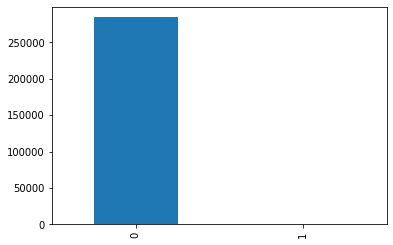

In [ ]:
# Visualize the Class Distribution.
pd.value_counts(data["Class"]).plot.bar()

In [ ]:
# Split Dataset into Feature and Target Set.
X = data.iloc[:, 1:30]
y = data.iloc[:, -1]

# Split Dataset into Training and Test Set.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Model Configuration.
BATCH_SIZE = 256
NO_EPOCHS = 100
NO_CLASSES = 2
VALIDATION_SPLIT = 0.2
VERBOSITY = 1
my_callbacks = [
    EarlyStopping(monitor="val_loss", patience=20, restore_best_weights=True)
]

# Model Architecture/Pipeline.
def create_model():
    model = Sequential()

    model.add(
        Dense(
            units=100,
            activation="relu",
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            kernel_regularizer=tf.keras.regularizers.l2(l2=0.01),
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(
        Dense(
            units=100,
            activation="relu",
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            kernel_regularizer=tf.keras.regularizers.l2(l2=0.01),
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(
        Dense(
            units=100,
            activation="relu",
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            kernel_regularizer=tf.keras.regularizers.l2(l2=0.01),
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(
        Dense(
            units=100,
            activation="relu",
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            kernel_regularizer=tf.keras.regularizers.l2(l2=0.01),
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(
        Dense(
            units=100,
            activation="relu",
            kernel_initializer=tf.keras.initializers.GlorotNormal(),
            kernel_regularizer=tf.keras.regularizers.l2(l2=0.01),
        )
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Dense(1, activation="sigmoid"))

    # Compile the Model.
    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy", CohenKappa(num_classes=NO_CLASSES)],
    )
    return model

In [ ]:
# Call the Model Architecture.
model = create_model()

# Build the Model.
model.build(X_train.shape)
model.summary()

# **Cost-Sensitive Learning**

The class distribution of the "**creditcard.csv**" dataset has a **1:560 ratio** for the minority class to the majority class.

Since the integers are recommended to represent the class weightings, such as 1 for no change and 560 for misclassification errors for class 1 have 560-times more impact or penalty than misclassification errors for class 0. We expect the class-weighted version of the neural network to perform better than the version of the training algorithm without any class weighting.

In [ ]:
"""
Weighted Neural Network:
    1. Define Weights.
    2. Fit the model with those specific weights.
"""

weights_assigned = {0: 1, 1: 560}

In [ ]:
# Fit the Model.
history = model.fit(
    X_train,
    y_train,
    class_weight=weights_assigned,
    batch_size=BATCH_SIZE,
    epochs=NO_EPOCHS,
    verbose=VERBOSITY,
    validation_split=VALIDATION_SPLIT,
    callbacks=my_callbacks,
)

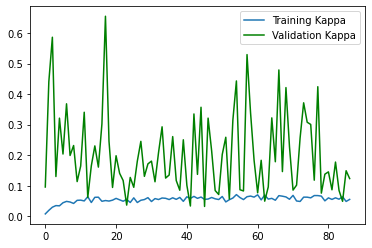

In [ ]:
# Plot Training and Validation Graph.
kap = history.history["cohen_kappa"]
val_kappa = history.history["val_cohen_kappa"]
epochs = len(kap)
plt.plot(np.arange(epochs), kap, label="Training Kappa")
plt.plot(np.arange(epochs), val_kappa, "g", label="Validation Kappa")
plt.legend()
plt.show()

In [ ]:
# Model Evaluation.
print(model.evaluate(X_test, y_test))

2226/2226 [==============================] - 5s 2ms/step - loss: 0.2856 - accuracy: 0.9971 - cohen_kappa: 0.4976
[0.28560060262680054, 0.9970927834510803, 0.49757033586502075]


In [ ]:
# Performance Score.
y_pred = model.predict(X_test)
print("\n ROC-AUC Score is ", roc_auc_score(y_test, y_pred))


 ROC-AUC Score is  0.9609815232495802
